# 探索图像数据资源

要从[图像数据资源(IDR)](https://idr.openmicroscopy.org/)下载图像，你只需要一个链接，例如请求tif格式的数据。然后你可以使用[scikit-image](https://scikit-image.org/)来打开图像。

下面显示的一些代码示例改编自[IDR API网站](https://idr.openmicroscopy.org/about/api.html)，由邓迪大学和开放显微镜环境根据[知识共享署名4.0国际许可证](https://creativecommons.org/licenses/by/4.0/)授权。

在以下示例中，我们下载了Stojic等人在[CC BY 4.0许可](https://creativecommons.org/licenses/by/4.0/)下共享的图像数据，可从IDR通过此URL获得：https://idr.openmicroscopy.org/webclient/?show=screen-2302 另请参阅相关出版物：https://www.nature.com/articles/s41467-020-14978-7

In [1]:
from skimage.io import imread, imshow
import json
import requests


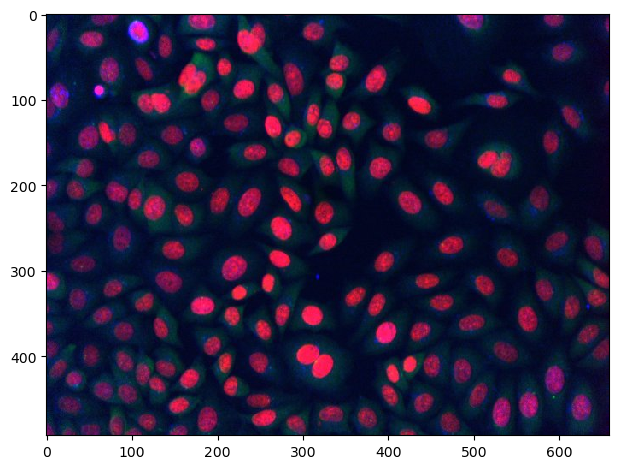

In [2]:
original_link = 'https://idr.openmicroscopy.org/webclient/render_image_download/9629351/?format=tif'
edited_link = 'https://idr.openmicroscopy.org/webclient/render_image/9629351/'

image = imread(edited_link)

imshow(image)

此外，如果你知道要下载的图像的标识符，可以从通用链接组装链接。

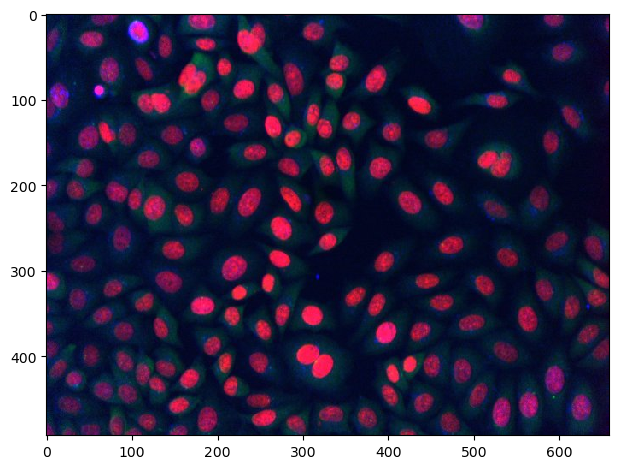

In [3]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"
image_id = 9629351

# 将通用url与图像ID组合
image_url = generic_image_url.format(**{"image_id":image_id})

# 下载并显示图像
image = imread(image_url)
imshow(image)

IDR[应用程序编程接口(API)](https://idr.openmicroscopy.org/about/api.html)还允许你技术性地浏览数据库。上面显示的图像是屏幕2303的一部分。首先，我们将查看此数据集提供的元数据注释。

In [4]:
# 配置要浏览的数据集
screen_id = 2302
MAP_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&{type}={screen_id}"

# 打开一个连接到互联网的接口
with requests.Session() as session:

    # 将通用MAP_URL转换为屏幕的特定URL
    qs = {'type': 'screen', 'screen_id': screen_id}
    url = MAP_URL.format(**qs)

    # 遍历所有注释并打印出来
    for a in session.get(url).json()['annotations']:
        namespace = a['ns']
        for v in a['values']:
            key = v[0]
            value = v[1]
            print (key, value)

Screen A https://idr.openmicroscopy.org/webclient/?show=screen-2301
Screen B https://idr.openmicroscopy.org/webclient/?show=screen-2302
Screen C https://idr.openmicroscopy.org/webclient/?show=screen-2303
Overview https://idr.openmicroscopy.org/webclient/?show=screen-2304
Sample Type cell
Organism Homo sapiens
Study Title Identification of long noncoding RNAs in regulation of cell division
Study Type high content screen
Screen Type primary screen
Screen Technology Type RNAi screen
Imaging Method spinning disk confocal microscopy
Publication Title A long noncoding RNA regulates microtubule behaviour during mitosis
Publication Authors Stojic L, Lun ATL, Mascalchi P, Ernst C, Redmond AM, Mangei J, Cooper S, Barr AR, Taylor C, Franklin VNR, Bakal C, Marioni JC, Odom DT, Gergely F
PubMed ID 32296040 https://www.ncbi.nlm.nih.gov/pubmed/32296040
PMC ID PMC7160116 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7160116
Publication DOI 10.1038/s41467-020-14978-7 https://doi.org/10.1038/s41467-020-1

接下来，我们可以浏览子数据集。我们正在查看一个[高内容筛选](https://en.wikipedia.org/wiki/High-content_screening)(HCS)数据集，通常以板的形式组织。一个for循环允许我们查看可用的板。

In [5]:
PLATES_URL = "https://idr.openmicroscopy.org/webclient/api/plates/?id={screen_id}"
qs = {'screen_id': screen_id}

# 从通用URL组装特定URL
url = PLATES_URL.format(**qs)

# 遍历所有板
for p in session.get(url).json()['plates']:
    plate_id = p['id'] # 注意，我们将在下面使用这个变量
    print (p['id'], p['name'], p['childCount'])

7361 1977 1
7368 1978 1
7366 1981 1
7367 1982 1
7379 1983 0
7369 1984 1
7371 1985 1
7370 1986 1
7372 1987 1
7375 1988 1


板以孔（在数字世界中你可以称之为表格）的形式组织，因此，我们可以用类似于浏览板的方式浏览所有孔。这次，我们将在第一行图像之后停止，只看几个小缩略图。只要你不需要完整的图像数据并且只是在浏览数据库，查看缩略图是很有意义的。



9762957


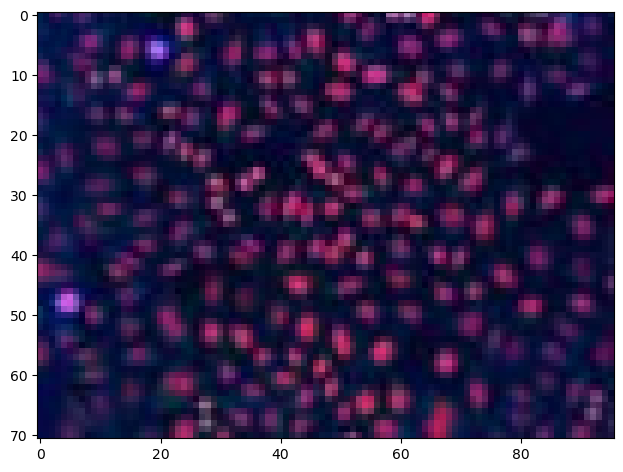

In [6]:
WELLS_IMAGES_URL = "https://idr.openmicroscopy.org/webgateway/plate/{plate_id}/{field}/"
THUMBNAIL_URL = "https://idr.openmicroscopy.org/webclient/render_thumbnail/{image_id}/"

qs = {'plate_id': plate_id, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()
rowlabels = grid['rowlabels']
collabels = grid['collabels']

# 遍历图像孔。
for row in grid['grid']:
    for cell in row:
        if cell is not None:
            # 读取图像特定信息，我们将在下面使用这个变量
            image_id = cell['id']

            # 打印图像ID并显示缩略图
            print(image_id)
            thumbnail = imread(THUMBNAIL_URL.format(**{'image_id':image_id}))
            imshow(thumbnail)

            # 在第一张图像后离开
            break

    # 在第一行后离开
    break

为了检索整个图像，我们可以使用上面显示的代码。

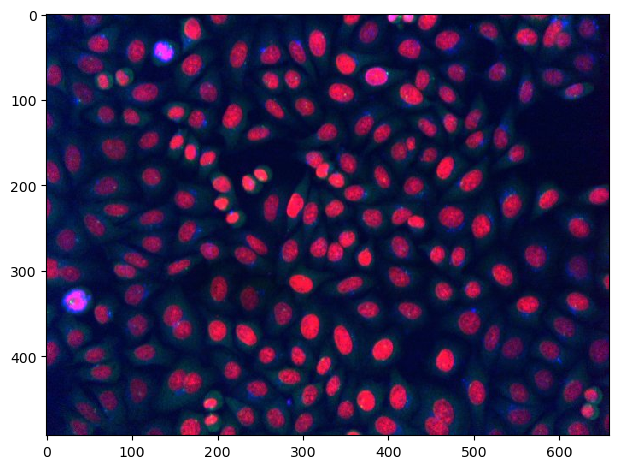

In [7]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"

# 将通用url与图像ID组合
image_url = generic_image_url.format(**{"image_id":image_id})

# 下载并显示图像
image = imread(image_url)
imshow(image)

此外，我们可以使用[json](https://www.json.org/json-en.html)打印出元数据。注意：我们可以在不下载图像的情况下查看元数据。

In [8]:
qs = {'image_id': image_id}
IMAGE_DETAILS_URL = "https://idr.openmicroscopy.org/webclient/imgData/{image_id}/"
url = IMAGE_DETAILS_URL.format(**qs)
r = session.get(url)
if r.status_code == 200:
    print (json.dumps(r.json(), indent=4, sort_keys=True))

{
    "channels": [
        {
            "active": true,
            "coefficient": 1.0,
            "color": "FF0000",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "alpha-tubulin (microtubule cytoskeleton)",
            "reverseIntensity": false,
            "window": {
                "end": 187.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "coefficient": 1.0,
            "color": "00FF00",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "gamma-tubulin (centrosomes)",
            "reverseIntensity": false,
            "window": {
                "end": 342.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "co